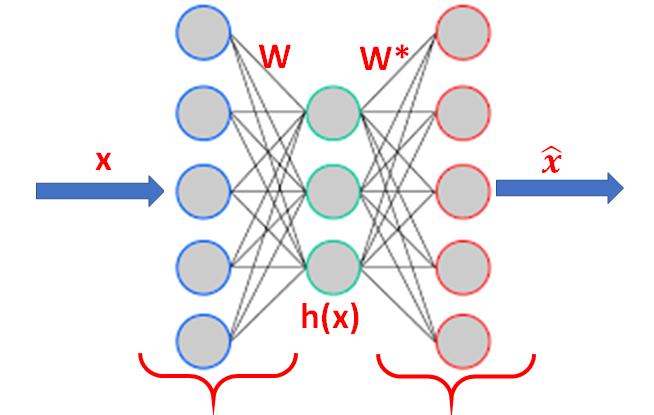


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 


# IMPORT LIBRARIES

In [3]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [4]:
tf.__version__

'2.7.0'

# LOAD DATASET

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [1]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip
!unzip traffic-signs-data.zip
!ls

--2021-11-21 19:54:13--  https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.226.23.155, 13.226.23.199, 13.226.23.18, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.226.23.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120740327 (115M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 115.15M  67.9MB/s    in 1.7s    

2021-11-21 19:54:15 (67.9 MB/s) - ‘traffic-signs-data.zip’ saved [120740327/120740327]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
sample_data  test.p  traffic-signs-data.zip  train.p


In [6]:
with open("./train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

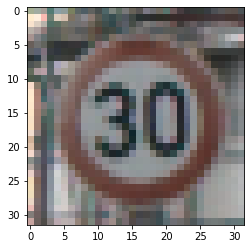

In [8]:
plt.imshow(X_train[1100])

# DATA VISUALIZATION

In [9]:
X_train.shape

(39209, 32, 32, 3)

In [10]:
X_test.shape

(12630, 32, 32, 3)

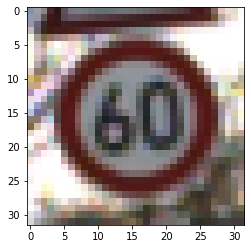

In [24]:
i = random.randint(1,34000) 

plt.imshow( X_train[i] , cmap = 'gray') 



In [12]:
label = y_train[i]
label


7

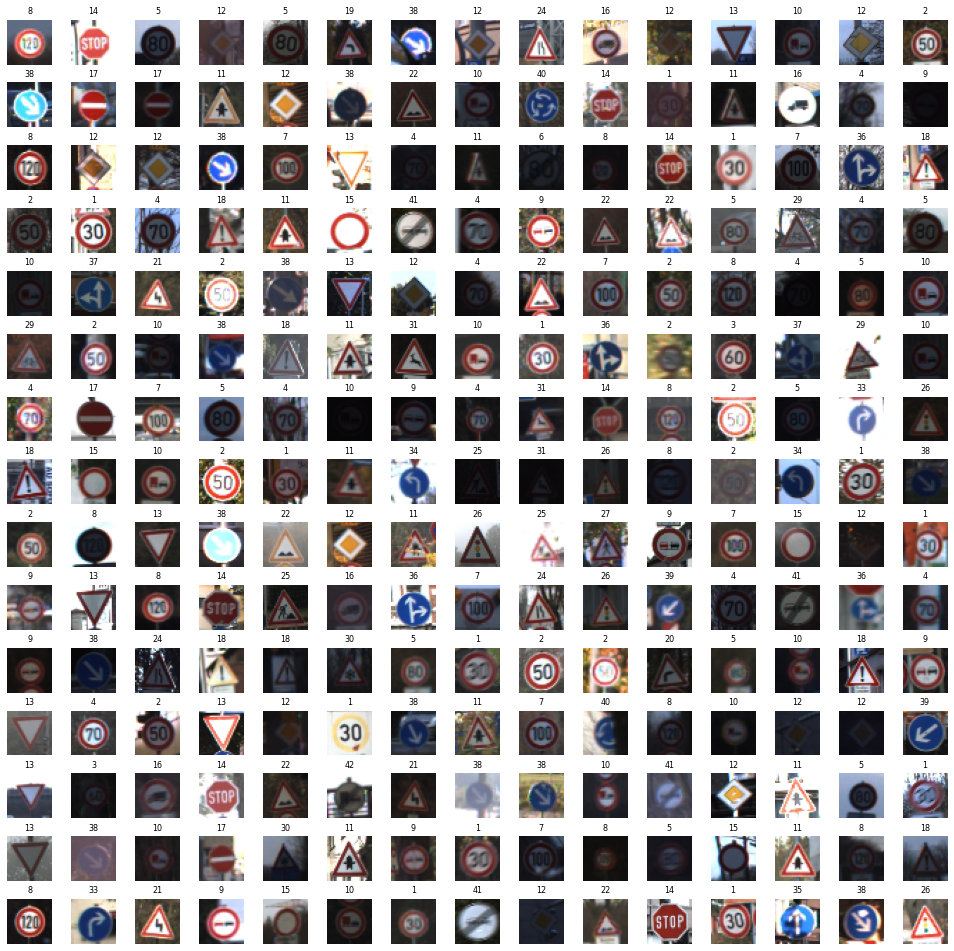

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) 


for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# DATA PREPROCESSING

In [14]:
X_train = X_train / 255
X_test = X_test / 255

# BUILD AND TRAIN OUR AUTOENCODER

In [15]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) # Encoded image (Code Layer)


# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [16]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 32)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
X_train.shape

(39209, 32, 32, 3)

In [19]:
X_test.shape

(12630, 32, 32, 3)

In [20]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))


Epoch 1/20
197/197 [==============================] - 42s 57ms/step - loss: 0.4797 - val_loss: 0.5207
Epoch 2/20
197/197 [==============================] - 11s 56ms/step - loss: 0.4668 - val_loss: 0.4855
Epoch 3/20
197/197 [==============================] - 11s 55ms/step - loss: 0.4637 - val_loss: 0.4753
Epoch 4/20
197/197 [==============================] - 11s 55ms/step - loss: 0.4618 - val_loss: 0.4725
Epoch 5/20
197/197 [==============================] - 11s 55ms/step - loss: 0.4604 - val_loss: 0.4604
Epoch 6/20
197/197 [==============================] - 11s 54ms/step - loss: 0.4596 - val_loss: 0.4720
Epoch 7/20
197/197 [==============================] - 11s 54ms/step - loss: 0.4595 - val_loss: 0.4699
Epoch 8/20
197/197 [==============================] - 11s 55ms/step - loss: 0.4584 - val_loss: 0.4586
Epoch 9/20
197/197 [==============================] - 11s 55ms/step - loss: 0.4574 - val_loss: 0.4582
Epoch 10/20
197/197 [==============================] - 11s 55ms/step - loss: 0.457

# EVALUATE THE MODEL

In [21]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

In [22]:
predicted.shape

(10, 32, 32, 3)

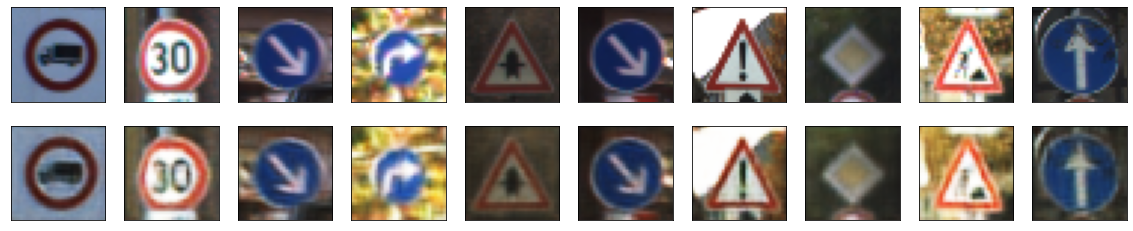

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)